# Question 1:
Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

In [61]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tsfel

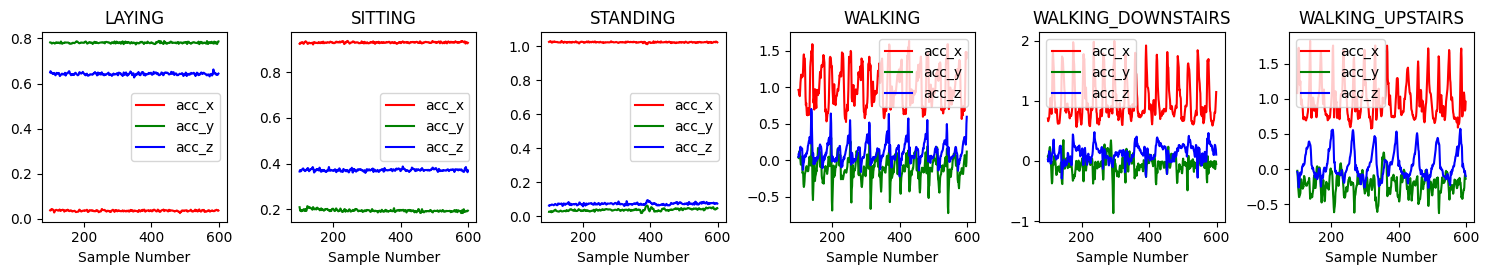

In [62]:
path = '/home/aech7/ML/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/Combined/Train'
activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

req_samples = 500
def load_file(file_path):
  df = pd.read_csv(file_path)
  total_samples = len(df)
  start_idx = 100
  end_idx = start_idx + req_samples
  return df.iloc[start_idx:end_idx]
fig, axs = plt.subplots(1,len(activities), figsize=(15,3), sharex=True)

for i,activity in enumerate(activities):
  file_path = os.path.join(path, activity, 'Subject_29.csv')
  data = load_file(file_path)
  axs[i].plot(data['accx'], label='acc_x', color='red')
  axs[i].plot(data['accy'], label='acc_y', color='green')
  axs[i].plot(data['accz'], label='acc_z', color='blue')
  axs[i].set_title(activity)
  axs[i].set_xlabel('Sample Number')
  axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We could observe a clear distinction between static and dynamic activities. The accelerations are almost constant with some noise wheareas the dyamic activities has a waveform. The orientation of the phone changes for different static activities like laying, sitting and standing, and we can observe that from the difference in the x,y and z acceleration for each case. While laying, the phone is almost flat therfore the x acceleration is close to zero, in sitting the phone tilts by 90 degree so can observe the increase in magnitude in x. The dynamic activities accelerations make a waveform, for walking since phone is upright, the x accelration is oscillating at a higher magnitude compared to other two. In all the dynamic situations since the phone is always upright the x acceleration is always more. We could still observe the difference in shape of the waveform between y and z acceleration between the dynamic activities.

Since each of the activities has some distinct features like change in x,y,z accelerations because of orientation change in static activities and change in amplitude and waveform in dynamic activities the model should be able to predict the activities.

# Question 2:

Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration ( a c c x 2 + a c c y 2 + a c c z 2 ) for each activity and justify your answer. [0.5 marks]

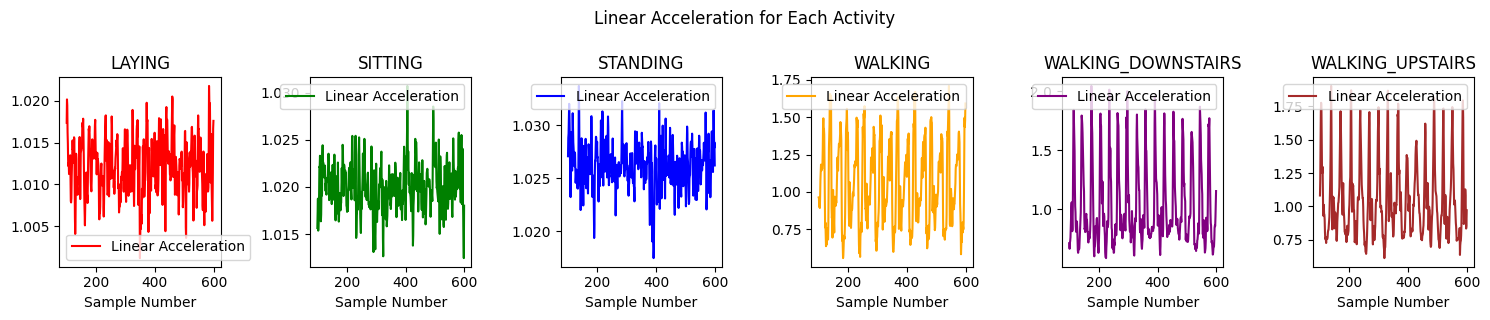

In [88]:
fig, axs = plt.subplots(1, len(activities), figsize=(15,3), sharex=True)
average_acc = []
T_acc =[]
color = ['red', 'green', 'blue','orange','purple','brown']
for i, activity in enumerate(activities):
    file_path = os.path.join(path, activity, 'Subject_29.csv')
    data = load_file(file_path)
    linear_acc = np.sqrt(data['accx']**2 + data['accy']**2 + data['accz']**2)
    T_acc.append(linear_acc)
    avg_val = linear_acc.mean()
    average_acc.append(avg_val)
    axs[i].plot(linear_acc, label=f'Linear Acceleration', color = color[i])
    axs[i].set_title(activity)
    axs[i].set_xlabel('Sample Number')
    axs[i].legend() 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Linear Acceleration for Each Activity", y=1.05)
plt.show()



In [87]:
static_indices = [0, 1, 2] 
dynamic_indices = [3, 4, 5]
threshold = (np.mean([average_acc[i] for i in static_indices]) + 
             np.mean([average_acc[i] for i in dynamic_indices])) / 2

print(f"\nThreshold to separate static and dynamic activities: {threshold:.4f}")
for i, activity in enumerate(activities):
    label = "Dynamic" if average_acc[i] > threshold else "Static"
    print(f"Activity: {activity:<20} Classified as: {label}")


Threshold to separate static and dynamic activities: 1.0295
Activity: LAYING               Classified as: Static
Activity: SITTING              Classified as: Static
Activity: STANDING             Classified as: Static
Activity: WALKING              Classified as: Dynamic
Activity: WALKING_DOWNSTAIRS   Classified as: Static
Activity: WALKING_UPSTAIRS     Classified as: Dynamic


As we could see, we could classify the dynamic and static activities even with simple thersholding so we don't need a machine learning model to find a distinction between them.

# Question 3:
Visualize the data using PCA. [1 marks]

# Question 3.1 :
Use PCA (Principal Component Analysis) on Total Acceleration ( a c c x 2 + a c c y 2 + a c c z 2 ) to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

In [65]:
X_train = []
y_train = []

for i, activity in enumerate(activities):
    activity_folder = os.path.join(path, activity)
    files = os.listdir(activity_folder)
    
    for file in files:
        file_path = os.path.join(activity_folder, file)
        trimmed_df = load_file(file_path)
        
        trimmed_df['total_acc'] = trimmed_df['accx']**2 + trimmed_df['accy']**2 + trimmed_df['accz']**2
        trimmed_df['linear_accn'] = np.sqrt(trimmed_df['accx']**2 + trimmed_df['accy']**2 + trimmed_df['accz']**2)
        
        X_train.append(trimmed_df[['accx', 'accy', 'accz', 'total_acc']].values)
        y_train.append(i)

X_train = np.array(X_train)  
y_train = np.array(y_train)  
print(X_train.shape)
print(y_train.shape)

(126, 500, 4)
(126,)


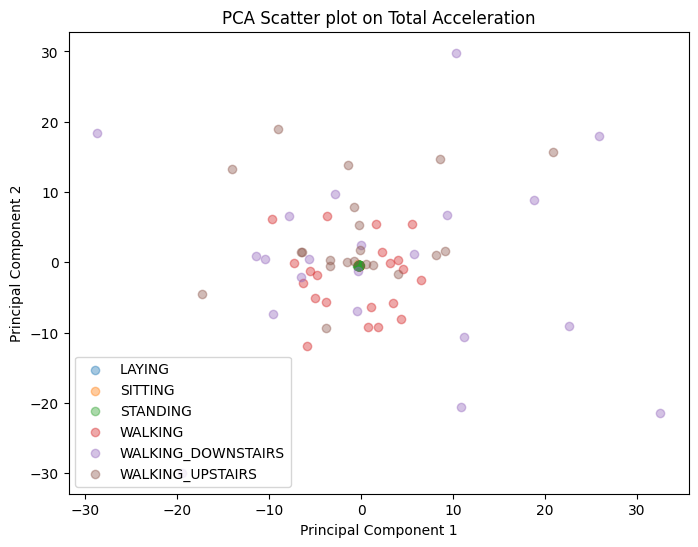

In [69]:
total_acc_data = X_train[:, :, 3] 
scaler = StandardScaler()
std_total_acc_data = scaler.fit_transform(total_acc_data)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(std_total_acc_data)
principalDf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principalDf['Activity'] = [activities[label] for label in y_train]  

plt.figure(figsize=(8, 6))
for activity in activities:
    indices = principalDf['Activity'] == activity
    plt.scatter(principalDf.loc[indices, 'PC1'], principalDf.loc[indices, 'PC2'], label=activity, alpha=0.4)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter plot on Total Acceleration')
plt.legend()
plt.show()



In [46]:
cfg = tsfel.get_features_by_domain() 
X_features = []

for sample_i in range(X_train.shape[0]):
    sample_feature_vector = []
    for feature_i in range(X_train.shape[2]):
        time_series = X_train[sample_i, :, feature_i]
        feats = tsfel.time_series_features_extractor(cfg, time_series)
        sample_feature_vector.extend(feats.values.flatten()) 
    X_features.append(sample_feature_vector)

X_features = np.array(X_features)  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
activity_names = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
y_labels = [activity_names[label] for label in y_train]

pc_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Activity': y_labels
})



/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


/tmp/ipykernel_13060/4015693153.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, time_series)


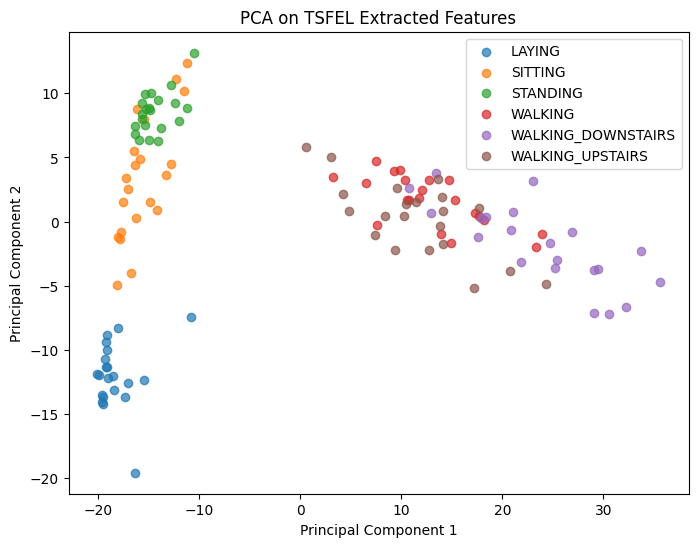

In [45]:
plt.figure(figsize=(8, 6))
for activity in activity_names:
    idx = pc_df['Activity'] == activity
    plt.scatter(pc_df.loc[idx, 'PC1'], pc_df.loc[idx, 'PC2'], label=activity, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on TSFEL Extracted Features')
plt.legend()
plt.show()

(7352, 561)
(7352, 1)


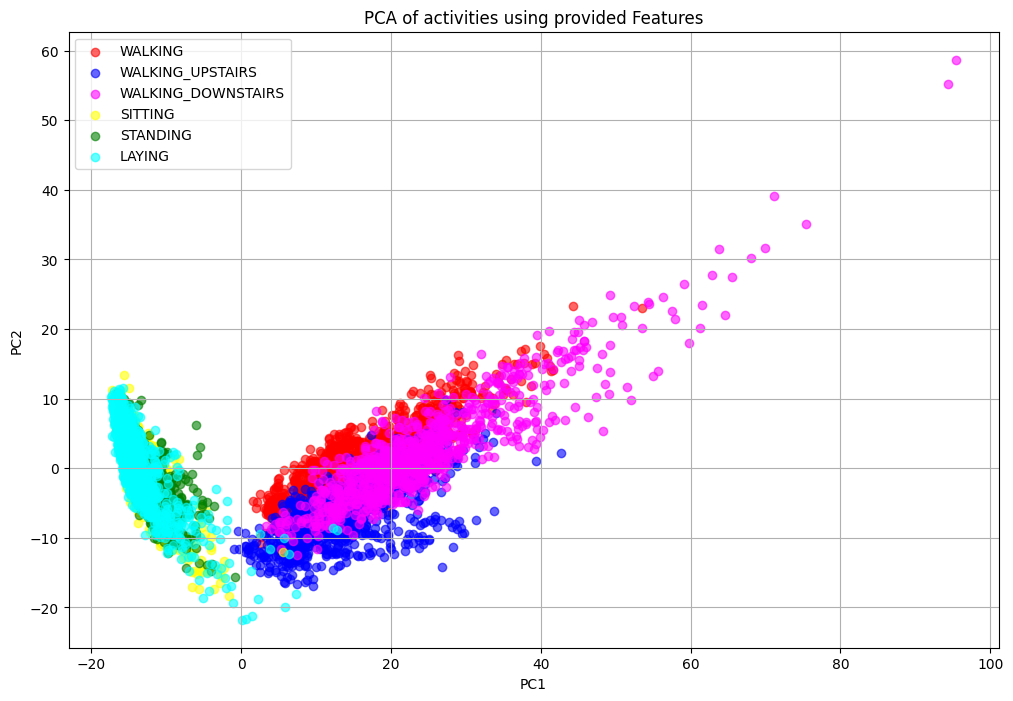

In [74]:
X_train_g=pd.read_csv("/home/aech7/ML/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt",sep=r"\s+",header=None)
X_train_g.to_csv("X_train_g.csv",index=False)
y_train_g=pd.read_csv("/home/aech7/ML/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt",sep=r"\s+",header=None)
y_train_g.to_csv("y_train_g.csv",index=False)

print(X_train_g.shape)
print(y_train_g.shape)

scaler = StandardScaler()
standardized_features = scaler.fit_transform(X_train_g)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_features)
g_pdf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
g_pdf['Activity'] = y_train_g

plt.figure(figsize=(12, 8))
colors = ['red','blue','magenta','yellow','green','cyan']  
activity_labels = np.unique(y_train_g)
activity_map = {1: 'WALKING',2: 'WALKING_UPSTAIRS',3: 'WALKING_DOWNSTAIRS',4: 'SITTING',5: 'STANDING',6: 'LAYING'}
for i,label in enumerate(activity_labels):
    subset = g_pdf[g_pdf['Activity'] == label]
    activity_name = activity_map.get(label, 'Unknown') 
    plt.scatter(subset['PC1'], subset['PC2'], color=colors[i], label=activity_name,alpha=0.6)

plt.title('PCA of activities using provided Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()



# Question 3.4:
Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

PCA on TSFEL features provides the most clear disctinction between different activities. PCA on total acceleration has a much simpler and less detailed view. The static activities are clustered well but the dynamics activities are scattered and overlapping.This suggests the PCA on TSFEL will give better results in a decision tree compared to total accerleration. We could observe clustering in the raw data but most of the dynamic activities and static activities are overlapping among themselves. So the decision tree trained using this could be able to classify between static and dynamic but won't be able to accurately predicts the activity itself.

# Question 4:
Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

In [73]:
tsfel_df = pd.DataFrame(X_features)
tsfel_corr = tsfel_df.corr()
tsfel_corr


,0,1,2,3,4,5,6,7,8,9,...,614,615,616,617,618,619,620,621,622,623
0,1.000000,0.980108,-0.269922,1.000000,0.257370,NaN,NaN,0.853889,0.973178,NaN,...,0.460032,0.492583,0.477872,0.490922,0.482961,0.471950,0.461527,0.452731,0.446950,NaN
1,0.980108,1.000000,-0.226415,0.980108,0.273590,NaN,NaN,0.919913,0.951653,NaN,...,0.342562,0.380460,0.366205,0.372122,0.359940,0.346853,0.335838,0.327530,0.324057,NaN
2,-0.269922,-0.226415,1.000000,-0.269922,-0.465086,NaN,NaN,-0.238159,-0.258918,NaN,...,-0.203640,-0.220142,-0.220053,-0.215342,-0.208169,-0.200515,-0.194267,-0.189943,-0.189272,NaN
3,1.000000,0.980108,-0.269922,1.000000,0.257370,NaN,NaN,0.853889,0.973178,NaN,...,0.460032,0.492583,0.477872,0.490922,0.482961,0.471950,0.461527,0.452731,0.446950,NaN
4,0.257370,0.273590,-0.465086,0.257370,1.000000,NaN,NaN,0.311401,0.262041,NaN,...,0.099578,0.117935,0.107045,0.115432,0.110742,0.105038,0.099834,0.096218,0.094856,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.471950,0.346853,-0.200515,0.471950,0.105038,NaN,NaN,0.022893,0.586687,NaN,...,0.928769,0.925840,0.867421,0.970339,0.993706,1.000000,0.996663,0.989476,0.972214,NaN
620,0.461527,0.335838,-0.194267,0.461527,0.099834,NaN,NaN,0.016540,0.574122,NaN,...,0.934580,0.899148,0.871124,0.950658,0.982195,0.996663,1.000000,0.996709,0.980447,NaN
621,0.452731,0.327530,-0.189943,0.452731,0.096218,NaN,NaN,0.014744,0.561580,NaN,...,0.952574,0.890806,0.883793,0.941427,0.973227,0.989476,0.996709,1.000000,0.992140,NaN
622,0.446950,0.324057,-0.189272,0.446950,0.094856,NaN,NaN,0.019165,0.550060,NaN,...,0.979049,0.892088,0.905825,0.934909,0.959991,0.972214,0.980447,0.992140,1.000000,NaN


In [75]:
given_df = pd.DataFrame(X_train_g)
given_corr = given_df.corr()
given_corr

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
1,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
2,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
3,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
4,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.037444,0.017967,-0.063609,0.018985,-0.008507,-0.018429,0.019389,-0.012546,-0.023525,0.025066,...,-0.026615,0.034514,0.024553,-0.006269,0.009141,1.000000,-0.116001,-0.005853,-0.012313,-0.019903
557,0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,0.000102,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656
558,-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,0.087332,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655
559,0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,-0.100125,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885


In [78]:
def redundant_features(corr_matrix, threshold=0.9):
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col].abs() > threshold)]
    return to_drop

red_tsfel = redundant_features(tsfel_corr, 0.9)
red_given= redundant_features(given_corr, 0.9)

print("Number of redundant TSFEL features:", len(red_tsfel))
print("Number of redundant HAR features:", len(red_given))


Number of redundant TSFEL features: 367
Number of redundant HAR features: 359


The highly correlated features are considered redundant because they provide similar information.